In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('heart.csv')


In [124]:
print(data.head)

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

In [4]:
Y = data['target']

In [6]:
Y_train = np.array(Y).reshape(len(Y),1)

In [9]:
X_train=data.loc[:,:'thal']

In [30]:
X_train = X_train.T
Y_train = Y_train.T

In [31]:
print(X_train.shape)
print(Y_train.shape)

(13, 303)
(1, 303)


In [26]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [51]:
def logisticregression(X,Y,lr,itr):
    m = X.shape[1]
    n = X.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    for i in range(itr):
        Z = np.dot(W.T,X)+B
        A = sigmoid(Z)
        cost = -(1/m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
        dW = (1/m)*np.dot(A-Y,X.T)
        dB = (1/m)*np.sum(A-Y)
        W = W - lr*dW.T
        B = B - lr*dB
        cost_list.append(cost)
        
        if(i%(itr/10)==0):
            print("cost after ",i,"iteration is ",cost)
        
    return W,B,cost_list   
        

In [118]:
itr = 500000
lr = 0.00009

W,B,cost_list = logisticregression(X_train,Y_train,lr,itr)

cost after  0 iteration is  0.6931471805599453
cost after  50000 iteration is  0.4191763164119229
cost after  100000 iteration is  0.38700965337716386
cost after  150000 iteration is  0.374766798846725
cost after  200000 iteration is  0.3683661953538638
cost after  250000 iteration is  0.3643957528894325
cost after  300000 iteration is  0.3616771161275108
cost after  350000 iteration is  0.3597007446810282
cost after  400000 iteration is  0.3582078686382306
cost after  450000 iteration is  0.35705045878259983


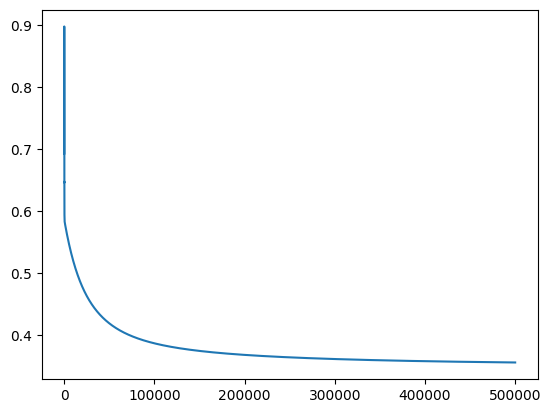

In [119]:
plt.plot(np.arange(itr),cost_list)

In [122]:
def accuracy(X,Y,W,B):
    Z = np.dot(W.T,X)+B
    A = sigmoid(Z)
    
    A=A>0.5
    A = np.array(A,dtype = 'int64')
    
    acc = (1-np.sum(np.absolute(A-Y))/Y.shape[1])*100
    
    print(acc)
    

In [123]:
accuracy(X_train,Y_train,W,B)

85.47854785478548


In [132]:
def predict(x):
    Z = np.dot(W.T,x) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    A = np.array(A,dtype = 'int64')
    return A
    

In [133]:
A = predict(X_train)

In [146]:
print(A)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
  1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0
  0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
  0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1
  0 0 0 0 0 1 0 0 1 0 0 1 0 0 1]]


ValueError: Found input variables with inconsistent numbers of samples: [13, 1]